# Evaluates a model on the Test-Dataset

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model


def load_data(data_dir, labels, img_size=250):
    X, y = [], []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)

        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]  # BGR → RGB
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X.append(resized_arr)
                y.append(class_num)
            except Exception as e:
                print(f"Fehler bei {img}: {e}")

    X = np.array(X) / 255.0  # Normalize
    y = np.array(y)
    return X, y
def evaluate_model(model, X, y_true, print_results=True):
    predictions = model.predict(X)
    y_pred = (predictions > 0.5).astype("int32").reshape(-1)

    # Print predictions
    if print_results:
        for i in range(len(y_pred)):
            print(f"Bild {i+1}: Vorhersage = {y_pred[i]}, Label = {y_true[i]}")

        accuracy = np.sum(y_pred == y_true) / len(y_true)
        print(f"\nGenauigkeit: {accuracy * 100:.2f}%")

    return y_pred
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Vorhergesagte Klasse')
    plt.ylabel('Echte Klasse')
    plt.title('Konfusionsmatrix')
    plt.show()


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F80DFAA980> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step
Bild 1: Vorhersage = 0, Label = 0
Bild 2: Vorhersage = 0, Label = 0
Bild 3: Vorhersage = 0, Label = 0
Bild 4: Vorhersage = 0, Label = 0
Bild 5: Vorhersage = 1, Label = 0
Bild 6: Vorhersage = 0, La

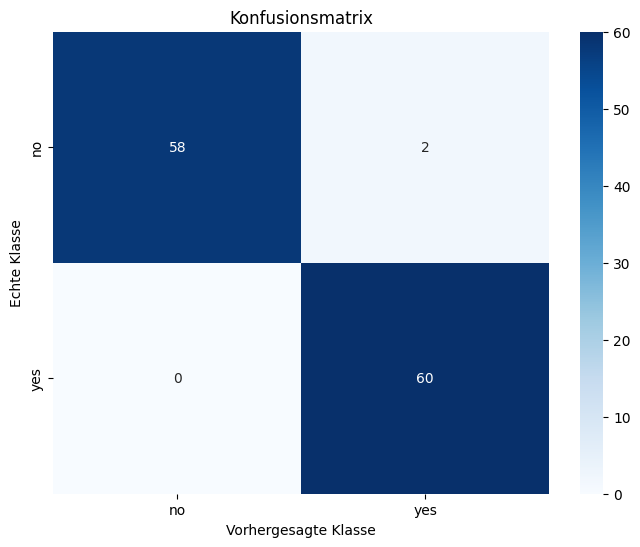


Data: Test Dataset

Model Name: 'cnn_optimised_sgd.keras'

Genauigkeit: 98.33%
F1-Score: 0.98


In [4]:
labels = ['no', 'yes']  # 'no' = 0, 'yes' = 1
model = load_model('models/cnn_optimised_sgd.keras')

# Load validation data
val_X, val_y = load_data('data_split/test', labels)

# Evaluate the model
val_predictions = evaluate_model(model, val_X, val_y, print_results=True) # print_results=True to see individual predictions

# Show confusion matrix
plot_confusion_matrix(val_y, val_predictions, labels)

# print accuracy and f1 score
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(val_y, val_predictions)
f1 = f1_score(val_y, val_predictions, average='weighted')
print(f"\nData: Test Dataset")
print(f"\nModel Name: 'cnn_optimised_sgd.keras'")
print(f"\nGenauigkeit: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1:.2f}")
